In [1]:
import joblib
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [3]:
model= joblib.load("braintumor.sav")
tumorlabel=3

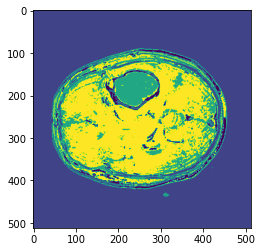

In [4]:
img=cv2.imread(r'C:\Users\hp\OneDrive\Desktop\Brain tumor minor\test_images\0 (237).jpg',0)
img_orignal=cv2.imread(r'C:\Users\hp\OneDrive\Desktop\Brain tumor minor\test_images\0 (237).jpg')
height,width=img.shape
imgflatten= img.reshape(height*width,1)
label=model.predict(imgflatten)
label2d =label.reshape(height,width,)
mask=(label2d==tumorlabel)
plt.imshow(label2d)

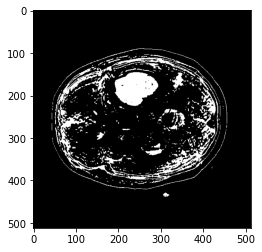

In [5]:
plt.imshow(mask,cmap='gray')

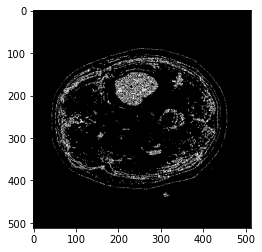

In [6]:
tumorExtracted=np.bitwise_and(mask,img)
plt.imshow(tumorExtracted,cmap='gray')

In [7]:
contours,hiearachy=cv2.findContours(tumorExtracted,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("no. of contours:", len(contours))
#cv2.drawContours(img_orignal,contours,1457,(0,255,255),2)

no. of contours: 2153


In [8]:
for index,cnt in enumerate(contours):
    
    area= cv2.contourArea(cnt)
    
    if area>1000:
        cv2.drawContours(img_orignal,[cnt],-1,(0,255,255),2)
        x,y,w,h=cv2.boundingRect(cnt)
        cv2.rectangle(img_orignal,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(img_orignal,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(img_orignal,"Tumor",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
        

    
cv2.imshow('LIVE',img_orignal)
cv2.waitKey(0)
cv2.destroyAllWindows()